In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [182]:
bollywood = pd.read_csv('Data/bollywood.csv')
bollywood.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [193]:
bollywood['Genre'] = bollywood['Genre'].apply(lambda x: x.strip())
bollywood['Genre'].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

# Dataset info

In [55]:
bollywood.shape

(149, 10)

In [56]:
bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
SlNo                   149 non-null int64
Release Date           149 non-null object
MovieName              149 non-null object
ReleaseTime            149 non-null object
Genre                  149 non-null object
Budget                 149 non-null int64
BoxOfficeCollection    149 non-null float64
YoutubeViews           149 non-null int64
YoutubeLikes           149 non-null int64
YoutubeDislikes        149 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 11.7+ KB


# Movies that got released in each genre

In [66]:
bollywood.Genre.value_counts().sort_values(ascending = False)

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [67]:
pd.crosstab(bollywood['Genre'], bollywood['ReleaseTime']

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


# Month in which max number of movies are released

In [72]:
bollywood['Release Month'] = bollywood['Release Date'].apply(lambda date: date[3:6])


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul


In [91]:
bollywood['Release Month'].value_counts().idxmax()

'Jan'

# Month which sees most high budget release

In [106]:
bollywood[bollywood['Budget']>25][['Release Month', 'Budget']]['Release Month'].value_counts().idxmax()

'Feb'

# Top 10 movies with highest ROIs

In [144]:
bollywood['roi'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget'])/bollywood['Budget']

In [145]:
print(bollywood.sort_values(by = ['roi'], ascending=False)[['MovieName', 'roi']].head(10))
bollywood.drop('roi', inplace = True, axis = 1)

                     MovieName       roi
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


# Average ROI in festive time

In [151]:
bollywood['roi'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget'])/bollywood['Budget']
print(bollywood.groupby('ReleaseTime')['roi'].agg(['mean', 'max', 'min']))
bollywood.drop('roi', inplace = True, axis = 1)

                 mean       max       min
ReleaseTime                              
FS           0.973853  5.666667 -0.926667
HS           0.850867  7.647059 -0.928571
LW           1.127205  7.514286 -0.858000
N            0.657722  8.166667 -0.995000


In [146]:
bollywood.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

# Histogram and Distribution Plot for budget

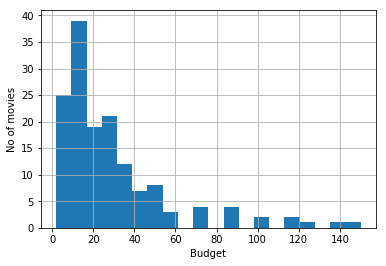

In [162]:
plt.hist(bollywood['Budget'], bins = 20)
plt.xlabel('Budget')
plt.ylabel('No of movies')
plt.grid()

Comedy


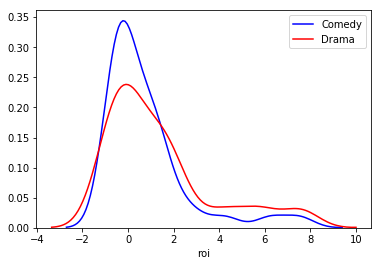

In [201]:
bollywood['roi'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget'])/bollywood['Budget']
x = bollywood[bollywood['Genre']=='Comedy']['roi']
print("Comedy")
sn.distplot(x, color='blue', label='Comedy', hist=False)
y = bollywood[bollywood['Genre']=='Drama']['roi']
sn.distplot(y, color='red', label='Drama', hist=False)

# Correlation between box office collection and youtube likes

In [212]:
print('Correlation between box office collection and youtube likes is {}'.format(bollywood[['BoxOfficeCollection', 'YoutubeLikes']].corr().iloc[0,1]))

Correlation between box office collection and youtube likes is 0.6825165877731297


# Genre with more youtube likes

In [218]:
bollywood.groupby('Genre')['YoutubeLikes'].max()

Genre
Action      101275
Comedy       20472
Drama        43767
Romance      26622
Thriller     18907
Name: YoutubeLikes, dtype: int64

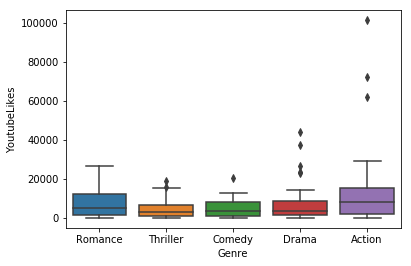

In [220]:
sn.boxplot(x = 'Genre', y = 'YoutubeLikes', data=bollywood)

# Finding correlation

In [222]:
features = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
bollywood[features].corr()

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


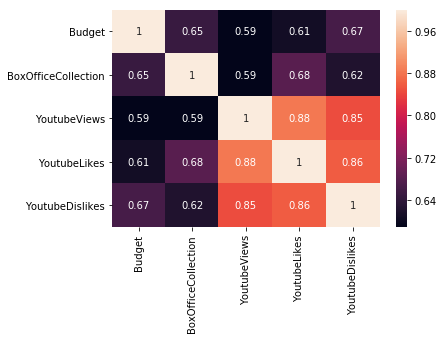

In [225]:
sn.heatmap(bollywood[features].corr(), annot=True)

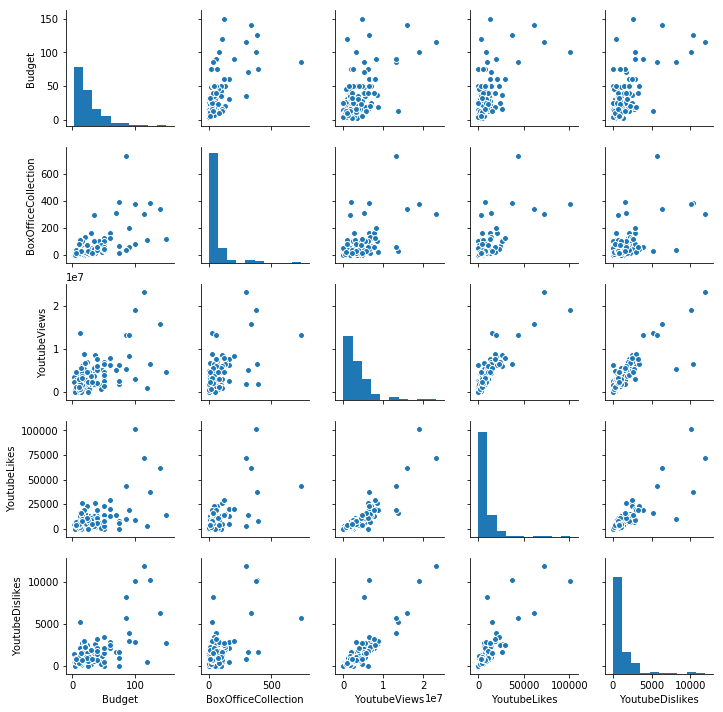

In [227]:
sn.pairplot(bollywood[features], size=2)

# HEART

In [255]:
heart_data = pd.read_csv('Data/heart.csv')
heart_data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Summary

In [230]:
heart_data.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [232]:
heart_data.head().transpose()

,0,1,2,3,4
row.names,1,2,3,4,5
sbp,160,144,118,170,134
tobacco,12,0.01,0.08,7.5,13.6
ldl,5.73,4.41,3.48,6.41,3.5
adiposity,23.11,28.61,32.28,38.03,27.78
famhist,Present,Absent,Present,Present,Present
typea,49,55,52,51,60
obesity,25.3,28.87,29.14,31.99,25.99
alcohol,97.2,2.06,3.81,24.26,57.34
age,52,63,46,58,49


In [233]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [234]:
heart_data.shape

(462, 11)

## Bar Plot of having CHD or not

In [257]:
heart_data['chd'] = heart_data['chd'].map({1:True,0:False})

In [258]:
heart_data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,True,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,True,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,False,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,True,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,True,mid


In [259]:
no_of_chd = heart_data['chd'].value_counts()

No handles with labels found to put in legend.


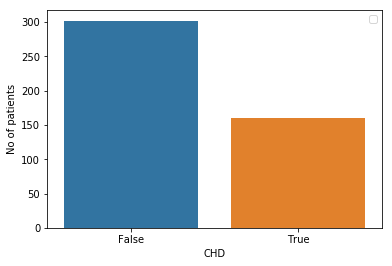

In [260]:
plt.xlabel('CHD')
plt.ylabel('No of patients')
plt.legend()
sn.barplot(x=no_of_chd.index, y=no_of_chd.values)
plt.show()

## Age relation with sbp

In [261]:
heart_data[['age','sbp']].corr()

,age,sbp
age,1.000000,0.388771
sbp,0.388771,1.000000


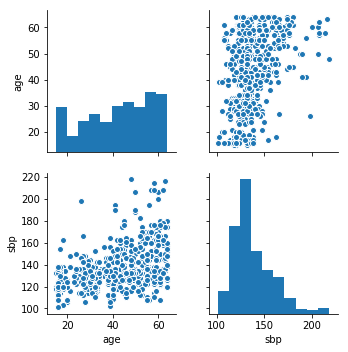

In [262]:
sn.pairplot(heart_data[['age','sbp']])

In [263]:
def age_group(x):
    if 0 < x < 15:
        return 'young'
    elif 15 < x <35:
        return 'adults'
    elif 35 < x < 55:
        return 'mid'
    return 'old'
heart_data['agegroup'] = heart_data['age'].apply(age_group)
heart_data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,True,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,True,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,False,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,True,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,True,mid


In [297]:
heart_data['agegroup'].value_counts()

mid       188
adults    140
old       134
Name: agegroup, dtype: int64

# Number of CHD cases with agegroup

In [289]:
age_group_data = heart_data[heart_data['chd'] == 1]['agegroup'].value_counts(ascending=True)
age_group_data_values = np.append([0], age_group_data.values)

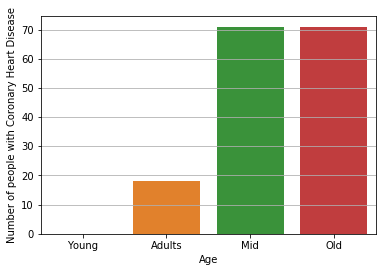

In [295]:
plt.xlabel('Age')
plt.ylabel('Number of people with Coronary Heart Disease')
plt.grid()
plt.size = (100,100)
sn.barplot(x = ['Young', 'Adults', 'Mid', 'Old'], y= age_group_data_values)


## Box Plot with agegroup against ldl

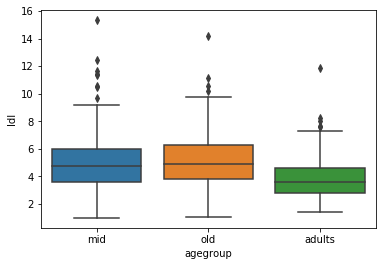

In [296]:
sn.boxplot(x = heart_data['agegroup'], y=heart_data['ldl'])